# Exploratory Data Analysis: dataset_final

This notebook analyzes the `dataset_final` dataset, including image counts, label distributions, and sample visualizations.

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from collections import Counter
import random
import numpy as np

%matplotlib inline

In [2]:
# Configuration
DATASET_ROOT = 'dataset_final'
SPLITS = ['train', 'val', 'test']

In [3]:
def get_label_from_filename(filename):
    """
    Extracts label from filename.
    Assumes format: LABEL.ext or LABEL_suffix.ext
    """
    base = os.path.splitext(filename)[0]
    # Remove potential suffixes like _1, _2 if they exist and constitute a specific pattern
    # Based on file listing, we see names like '75N1960G_1.png'. 
    # We probably want '75N1960G' as the label.
    if '_' in base:
        # Check if the part after _ is a digit (simple heuristic)
        parts = base.split('_')
        if parts[-1].isdigit():
            return "_".join(parts[:-1])
    return base

def load_dataset_metadata(root, splits):
    data = []
    for split in splits:
        path = os.path.join(root, split)
        if not os.path.exists(path):
            print(f"Warning: Path {path} does not exist.")
            continue
            
        files = glob.glob(os.path.join(path, '*'))
        for f in files:
            if os.path.isfile(f):
                filename = os.path.basename(f)
                label = get_label_from_filename(filename)
                data.append({
                    'filepath': f,
                    'filename': filename,
                    'label': label,
                    'split': split
                })
    return pd.DataFrame(data)

In [4]:
# Load Data
df = load_dataset_metadata(DATASET_ROOT, SPLITS)
print(f"Total images: {len(df)}")
df.head()

Total images: 735


,filepath,filename,label,split
0,dataset_final/train/G98085.png,G98085.png,G98085,train
1,dataset_final/train/W178JZ.jpg,W178JZ.jpg,W178JZ,train
2,dataset_final/train/VSAV88.png,VSAV88.png,VSAV88,train
3,dataset_final/train/CM855DY.png,CM855DY.png,CM855DY,train
4,dataset_final/train/KR336P.png,KR336P.png,KR336P,train


split
train    588
val       74
test      73
Name: count, dtype: int64


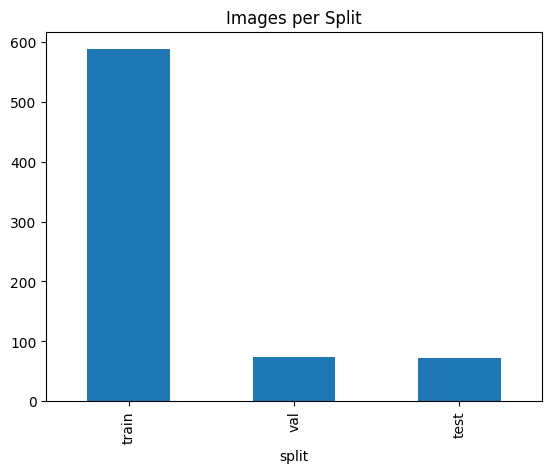

In [5]:
# Count by Split
split_counts = df['split'].value_counts()
print(split_counts)
split_counts.plot(kind='bar', title='Images per Split')
plt.show()

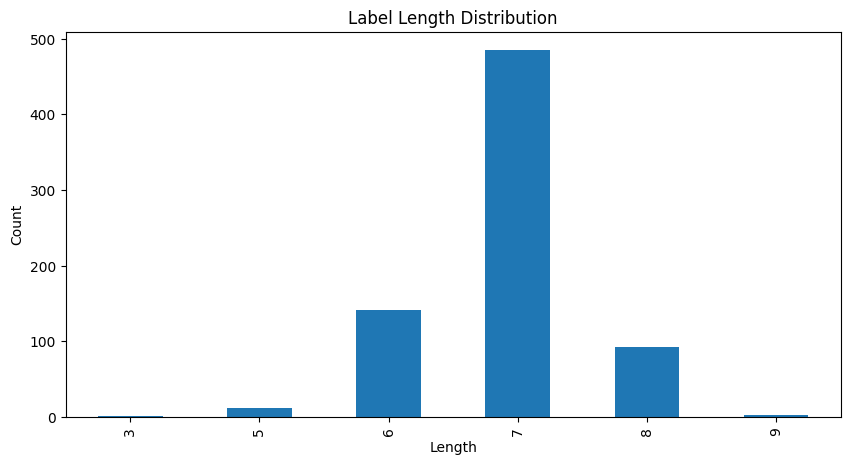

count    735.000000
mean       6.904762
std        0.642854
min        3.000000
25%        7.000000
50%        7.000000
75%        7.000000
max        9.000000
Name: label_len, dtype: float64


In [6]:
# Label Length Analysis
df['label_len'] = df['label'].apply(len)

plt.figure(figsize=(10, 5))
df['label_len'].value_counts().sort_index().plot(kind='bar')
plt.title('Label Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

print(df['label_len'].describe())

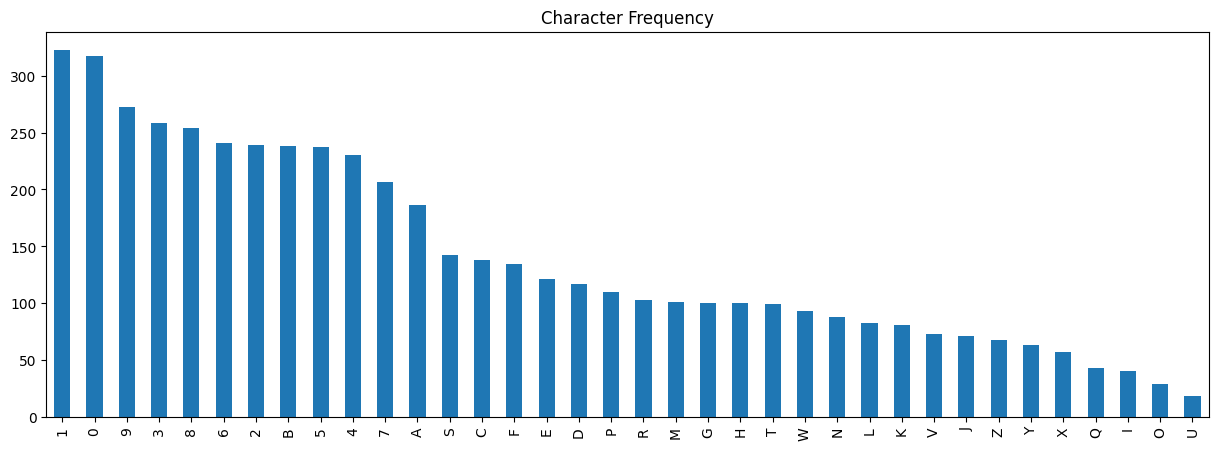

In [7]:
# Character Frequency
all_chars = "".join(df['label'].tolist())
char_counts = Counter(all_chars)

char_df = pd.DataFrame.from_dict(char_counts, orient='index', columns=['count'])
char_df = char_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(15, 5))
char_df['count'].plot(kind='bar')
plt.title('Character Frequency')
plt.show()

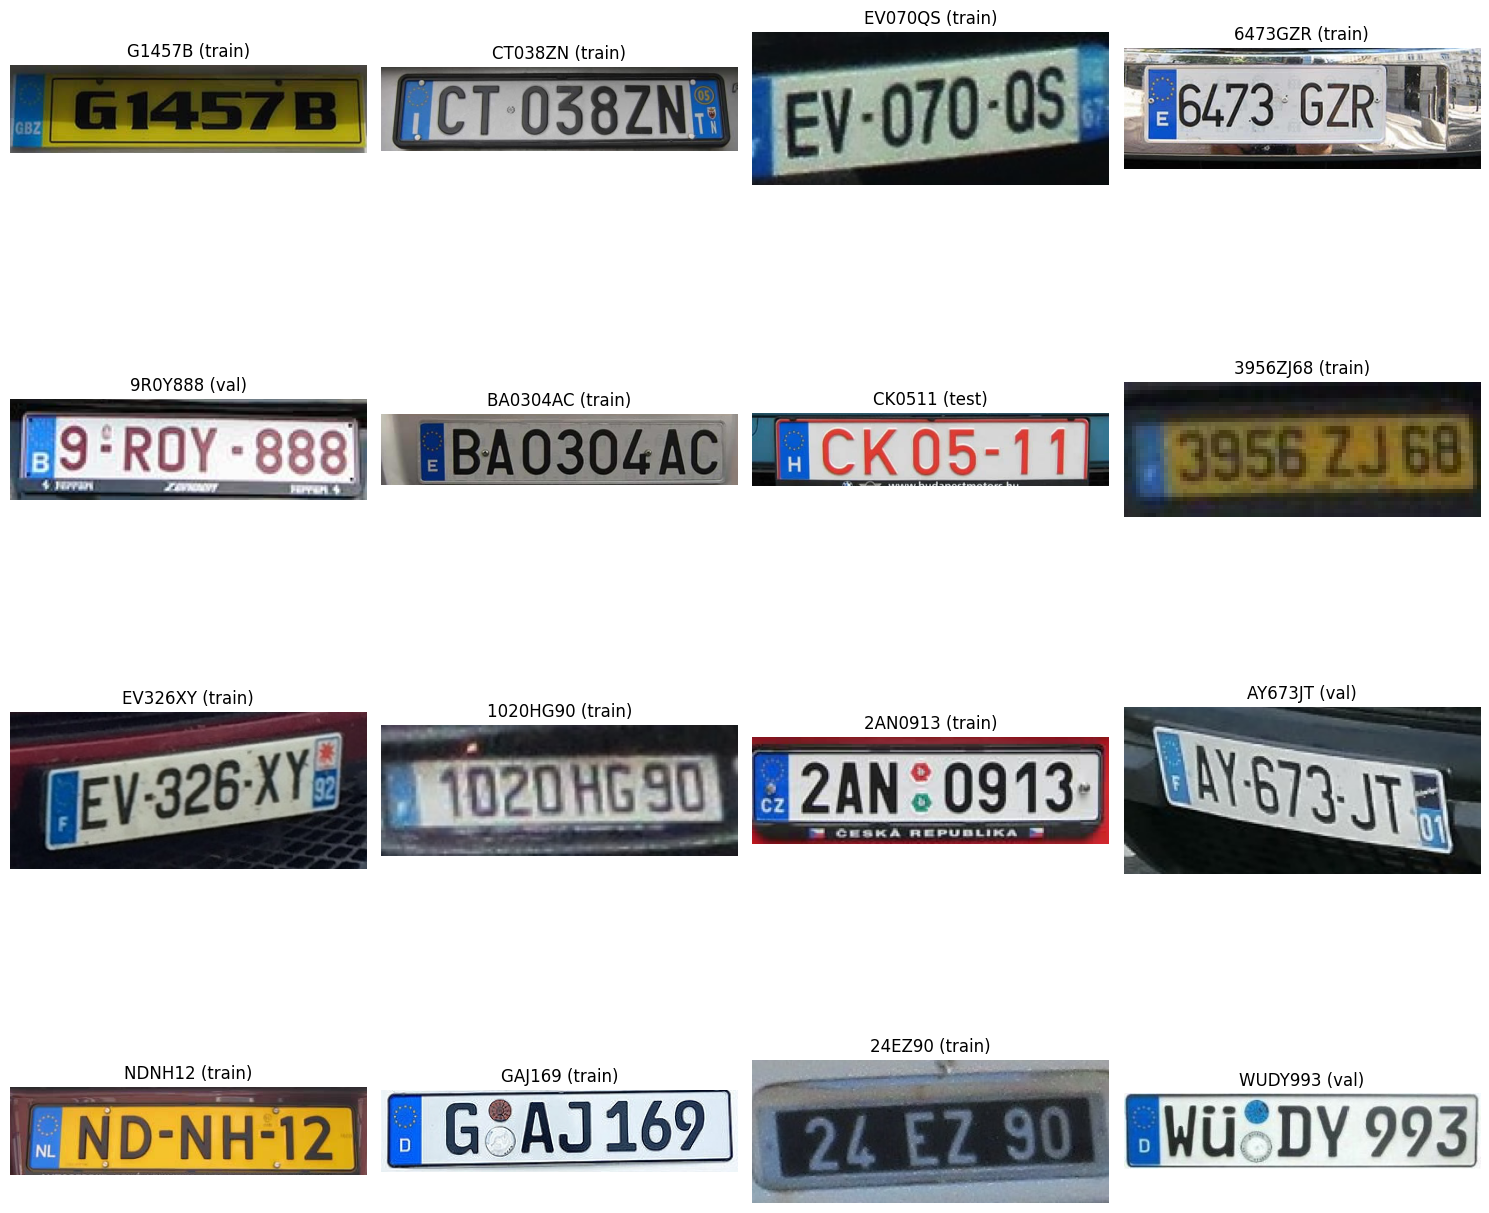

In [8]:
# Sample Visualization
def show_samples(df, num_samples=16):
    plt.figure(figsize=(15, 15))
    samples = df.sample(n=min(len(df), num_samples))
    
    for i, (_, row) in enumerate(samples.iterrows()):
        plt.subplot(4, 4, i+1)
        img = cv2.imread(row['filepath'])
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"{row['label']} ({row['split']})")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_samples(df)

In [9]:
# Check for duplicates/overlap between splits (sanity check)
train_labels = set(df[df['split']=='train']['label'])
val_labels = set(df[df['split']=='val']['label'])
test_labels = set(df[df['split']=='test']['label'])

print(f"Intersection Train-Val: {len(train_labels.intersection(val_labels))}")
print(f"Intersection Train-Test: {len(train_labels.intersection(test_labels))}")
print(f"Intersection Val-Test: {len(val_labels.intersection(test_labels))}")

Intersection Train-Val: 9
Intersection Train-Test: 6
Intersection Val-Test: 0
